In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('netflix_data.csv')

In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [14]:
data['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [15]:
data_movies_only = data[data['type'] == 'Movie']
netflix_movies_col_subset = data_movies_only[['title','country','genre','release_year','duration']]

In [16]:
my_data = data_movies_only[['country','release_year']]

In [17]:
my_data = my_data.reset_index(drop = True)
my_data = my_data.dropna()

In [18]:
after_2001 = my_data.groupby(['release_year']).count()[my_data.groupby(['release_year']).count()['country']>30]

In [19]:
after_2001.rename(columns = {'country':'Number of Movies'}, inplace = True)

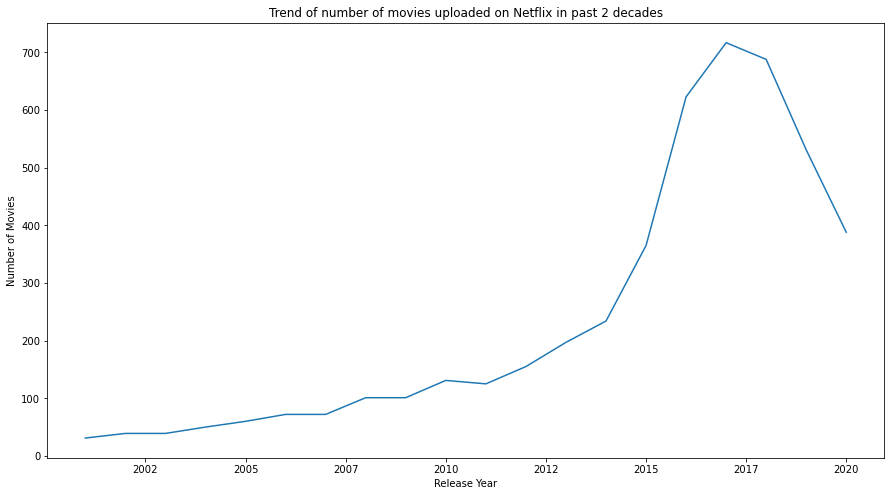

In [20]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize = (15,8))
ax = sns.lineplot(data = after_2001, x = 'release_year', y = 'Number of Movies')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.xlabel('Release Year')
plt.title('Trend of number of movies uploaded on Netflix in past 2 decades')
plt.show()

In [147]:
data_g = my_data[my_data['release_year'] >2000]

In [148]:
data_gp = data_g.pivot_table(columns=['country'], aggfunc='size')
a1 = data_gp.sort_values(ascending = False)
df = a1.to_frame().reset_index()
df.rename(columns = {0:'Number of Movies'}, inplace = True)
df.head()

,country,Number of Movies
0,United States,1889
1,India,795
2,United Kingdom,314
3,Canada,174
4,France,129


In [149]:
options = ['United States','India','United Kingdom','Canada','Spain']

In [150]:
data_g2015_top = data_g[data_g['country'].isin(options)].reset_index(drop =True)

In [151]:
data_g2015_top = data_g2015_top[data_g2015_top['release_year'] != 2021]

In [153]:
data = data_g2015_top.groupby('country').agg({'release_year':'value_counts'})

In [154]:
data.rename(columns = {'release_year':'Number of movies'}, inplace = True)

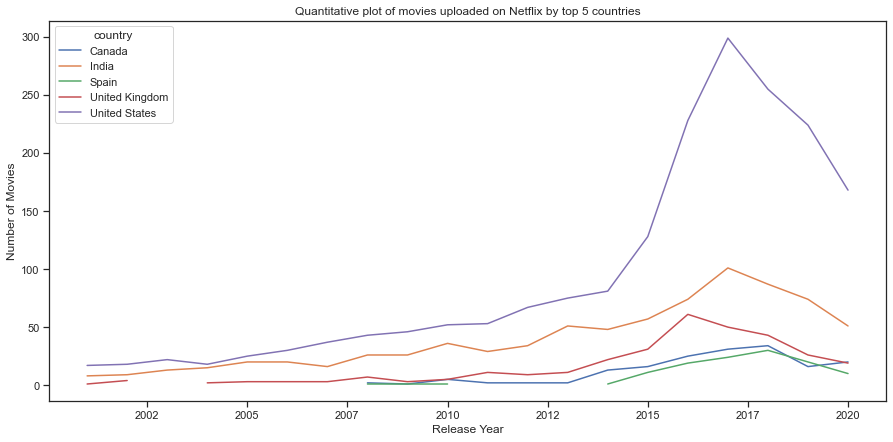

In [166]:
from matplotlib.ticker import FormatStrFormatter
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
data.groupby(['release_year','country']).sum()['Number of movies'].unstack().plot(ax=ax)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Quantitative plot of movies uploaded on Netflix by top 5 countries')
plt.show()

In [23]:
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


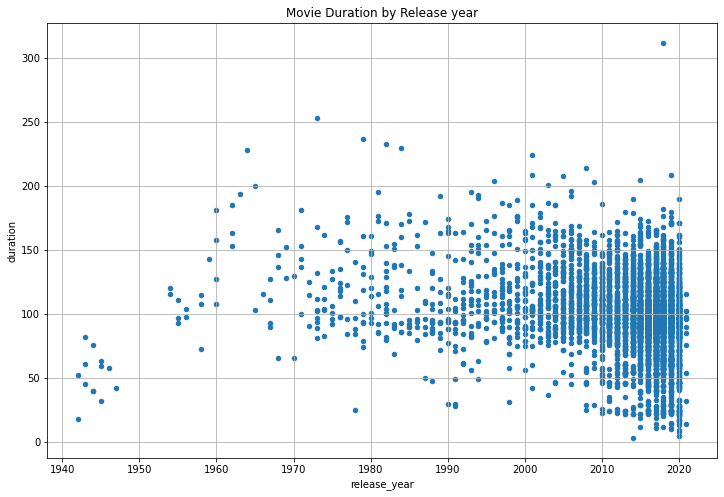

In [24]:
netflix_movies_col_subset.plot(x = 'release_year',  y= 'duration', figsize = (12,8), kind = 'scatter')
plt.title('Movie Duration by Release year')
plt.grid()
plt.show()

#We observe from the above plot that with increase in time the duration of movies are decreasing.

In [25]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset.duration < 60]
short_movies.head(15)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [26]:
colors = []
for gen,row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == 'Children' :
        colors.append('red')
    elif row['genre'] == "Documentaries" :
        colors.append('blue')
    elif row['genre'] == "Stand-Up" :
        colors.append('green')
    else:
        colors.append('black')

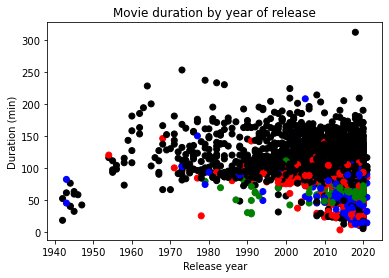

In [27]:
plt.scatter(x = 'release_year', y = 'duration', data =netflix_movies_col_subset, c=colors)
plt.title('Movie duration by year of release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.show()

#Most of the movies of genre Children,documentaries,standup have duration less than 60 minutes. Hence we cannot conclude that with time the duration of all the movies are decreasing.